## Importing necessary libraries for analysis

In [8]:
import math
from scipy.linalg import *
from sklearn.datasets import make_checkerboard
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Creating data for application of algorithm

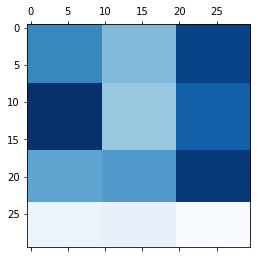

In [23]:
n_clusters   = (4,3)
A,_,_        = make_checkerboard(shape = (30,30),n_clusters = n_clusters,shuffle=False,random_state=0)
plt.matshow(A, cmap=plt.cm.Blues);


## Creating the Row and Column diagonal matrices and also applying SVD on An

In [10]:
D_one_half = np.diag([np.power(A[i].sum(),-0.5) for i in range(A.shape[0])])
D_two_half = np.diag([np.power(A.T[i].sum(),-0.5) for i in range(A.shape[1])])
An         = (D_one_half.dot(A)).dot(D_two_half)
U,S,Vt     = svd(An)

## Input parameters for the Co clustering

In [11]:
k          = 4
l          = int(np.ceil(math.log(k,2)))

## Creating the matrix for application of kmeans algorithm

In [13]:
Ul         = U[:,1:(l+1)]
Vl         = Vt.T[:,1:(l+1)]
Z          = np.vstack((Ul,Vl))

## Applying KMeans on the data Z and performing clustering 

In [15]:
kmeans     = KMeans(n_clusters=k)
kmeans.fit(Z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
labels          = kmeans.labels_
row_clusters    = labels[:A.shape[0]]
column_clusters = labels[A.shape[0]:]

## We can clearly see the 4 clusters corresponding to the rows

In [21]:
row_clusters

array([3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2])

## We can clearly see the 3 clusters corresponding to the columns

In [22]:
column_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3])